In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc
import platform
sns.set(style='darkgrid')

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [32]:
df_money = pd.read_csv('./실습데이터/환율_종합.csv', parse_dates=['일자'], encoding='cp949')

In [35]:
df_money.corr(method='kendall')

,위안
위안,1.0


In [11]:
#달러 위안 엔화 유로중 가장 달러에 영향을 끼치는 데이터 상관분석

In [36]:
df_money = df_money[['일자', '달러', '엔화', '유로']]

In [45]:
df_new = df_money[:-4]

In [49]:
df_new = df_new.dropna()

In [52]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6814 entries, 7191 to 14004
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   일자      6814 non-null   object
 1   달러      6814 non-null   object
 2   엔화      6814 non-null   object
 3   유로      6814 non-null   object
dtypes: object(4)
memory usage: 266.2+ KB


In [54]:
df_new['엔화'] = df_new['엔화'].str.replace(',', '')
df_new['달러'] = df_new['달러'].str.replace(',', '')
df_new['유로'] = df_new['유로'].str.replace(',', '')

In [55]:
df_new['엔화'] = pd.to_numeric(df_new['엔화'])
df_new['달러'] = pd.to_numeric(df_new['달러'])
df_new['유로'] = pd.to_numeric(df_new['유로'])

In [58]:
df_new.corr()

,달러,엔화,유로
달러,1.000000,0.667841,0.637045
엔화,0.667841,1.000000,0.759520
유로,0.637045,0.759520,1.000000


<AxesSubplot:>

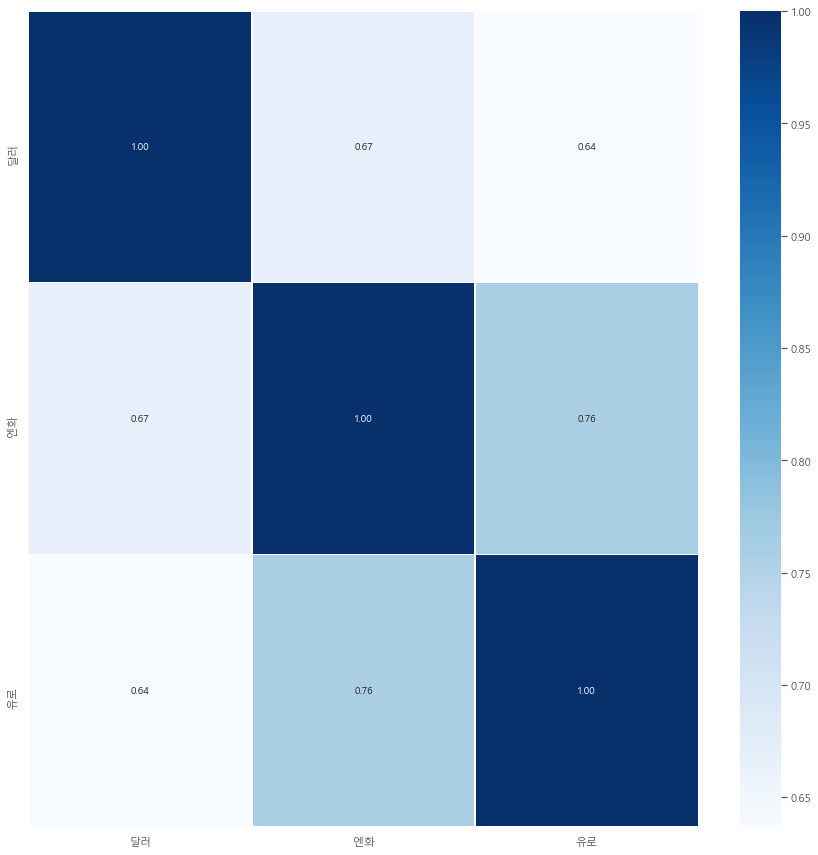

In [62]:
plt.figure(figsize=(15,15))
sns.heatmap(data = df_new.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [63]:
#이제 금, 유가, 나스닥, 다우존슨, S&P와 달러의 corr확인(종가로만)
#데이터프레임 합치기

In [65]:
oil = pd.read_csv('./실습데이터/oil.csv', parse_dates = ['Date'], encoding='cp949')
gold = pd.read_csv('./실습데이터/gold.csv', parse_dates=['Date'], encoding='cp949')
nasdaq = pd.read_csv('./실습데이터/nasdaq.csv', parse_dates=['Date'], encoding='cp949')
dow = pd.read_csv('./실습데이터/dow.csv', parse_dates=['Date'], encoding='cp949')
snp = pd.read_csv('./실습데이터/S&P500.csv', parse_dates=['Date'], encoding='cp949')
dollar = pd.read_csv('./실습데이터/환율_종합.csv', parse_dates=['일자'], encoding='cp949')

In [66]:
#dollar 데이터프레임에 나머지 데이터프레임들 추가해주기 및 날자 정리

In [68]:
dollar = dollar[:-4]

In [71]:
dollar = dollar[['일자','달러']]

In [74]:
oil = oil[['Date', 'Close']]
gold = gold[['Date', 'Close']]
nasdaq = nasdaq[['Date', 'Close']]
dow = dow[['Date', 'Close']]
snp = snp[['Date', 'Close']]

In [80]:
df_dollar = dollar.set_index('일자')

In [84]:
df_oil = oil.set_index('Date')
df_gold = gold.set_index('Date')
df_nasdaq =  nasdaq.set_index('Date')
df_dow = dow.set_index('Date')
df_snp = snp.set_index('Date')

In [92]:
df_oil.rename(columns = {'Close' : 'oil_close'}, inplace = True)

In [93]:
df_gold.rename(columns = {'Close' : 'gold_close'}, inplace = True)
df_nasdaq.rename(columns = {'Close' : 'nasdaq_close'}, inplace = True)
df_dow.rename(columns = {'Close' : 'dow_close'}, inplace = True)
df_snp.rename(columns = {'Close' : 'snp_close'}, inplace = True)

In [91]:
#종가 이름이 전부 똑같아서 바꿔줘야함

In [94]:
df_dollar = df_dollar.join(df_oil)
df_dollar = df_dollar.join(df_gold)
df_dollar = df_dollar.join(df_nasdaq)
df_dollar = df_dollar.join(df_dow)
df_dollar = df_dollar.join(df_snp)

In [96]:
df_dollar = df_dollar.drop(['Close'], axis=1)

In [100]:
df_dollar = df_dollar.dropna()

In [113]:
df_dollar = df_dollar.reset_index()

In [116]:
df_dollar.rename(columns = {'달러' : 'dollar'}, inplace = True)

In [121]:
df_dollar['dollar'] = df_dollar['dollar'].str.replace(',', '')
df_dollar['dollar'] = pd.to_numeric(df_dollar['dollar'])

In [122]:
df_dollar

,일자,dollar,oil_close,gold_close,nasdaq_close,dow_close,snp_close
0,2000-08-31,1109,33.099998,278.299988,4206.350098,11215.099609,1517.680054
1,2000-09-01,1109,33.380001,277.000000,4234.330078,11238.780273,1520.770020
2,2000-09-05,1105,33.799999,275.799988,4143.180176,11260.610352,1507.079956
3,2000-09-06,1105,34.950001,274.200012,4013.340088,11310.639648,1492.250000
4,2000-09-07,1106,35.330002,274.000000,4098.350098,11259.870117,1502.510010
...,...,...,...,...,...,...,...
4792,2020-10-22,1134,40.639999,1901.099976,11506.009766,28363.660156,3453.489990
4793,2020-10-23,1134,39.849998,1902.000000,11548.280273,28335.570313,3465.389893
4794,2020-10-26,1135,38.560001,1902.699951,11358.940430,27685.380859,3400.969971
4795,2020-10-27,1129,39.570000,1908.800049,11431.349609,27463.189453,3390.679932


In [123]:
df_dollar.corr()

,dollar,oil_close,gold_close,nasdaq_close,dow_close,snp_close
dollar,1.000000,-0.510811,-0.074807,-0.004212,-0.088298,-0.088962
oil_close,-0.510811,1.000000,0.517632,-0.059535,0.008026,-0.031581
gold_close,-0.074807,0.517632,1.000000,0.625620,0.619373,0.595197
nasdaq_close,-0.004212,-0.059535,0.625620,1.000000,0.978860,0.986885
dow_close,-0.088298,0.008026,0.619373,0.978860,1.000000,0.994218
snp_close,-0.088962,-0.031581,0.595197,0.986885,0.994218,1.000000


<AxesSubplot:>

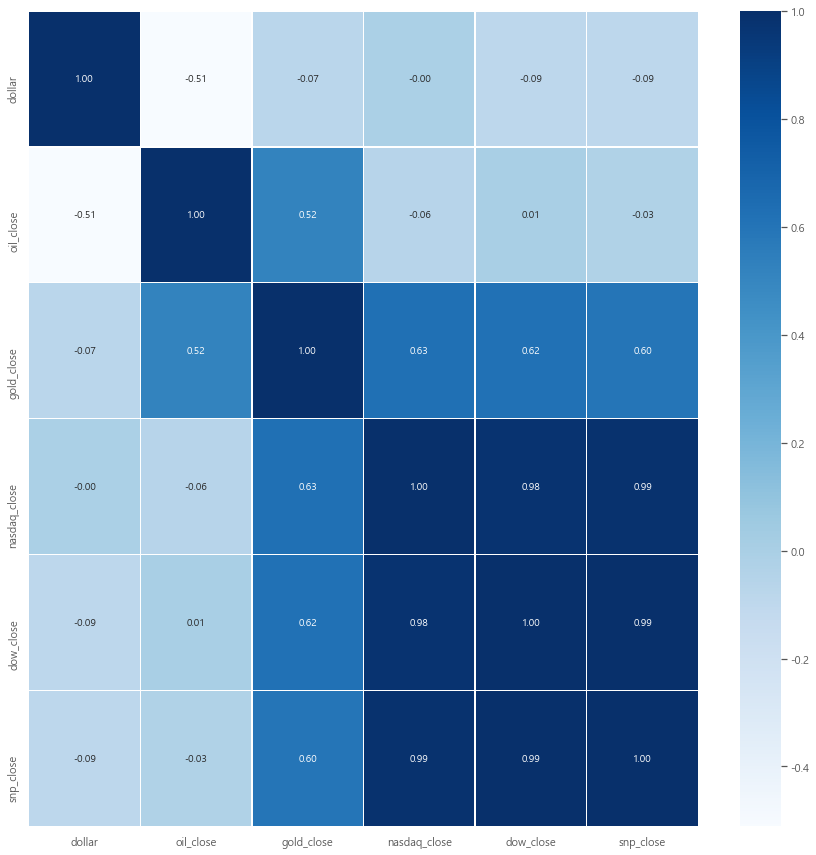

In [124]:
plt.figure(figsize=(15,15))
sns.heatmap(data = df_dollar.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [125]:
#상관관계를 살펴본 결과 oil말고는 크게 상관이 없는것으로 나타났음
#따라서 oil과 위에서 살펴본 엔화와 유로화만 추가하고 나머지는 제거하도록 함

In [201]:
df_money = pd.read_csv('./실습데이터/환율_종합.csv', parse_dates=['일자'], encoding='cp949')
df_oil = pd.read_csv('./실습데이터/oil.csv', parse_dates=['Date'], encoding='cp949')

In [202]:
df_money = df_money.drop(['위안'], axis=1)

In [203]:
df_oil

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-08-24,31.900000,32.240002,31.400000,31.629999,31.629999,72978.0
1,2000-08-25,31.700001,32.099998,31.320000,32.049999,32.049999,44601.0
2,2000-08-27,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-08-28,32.040001,32.919998,31.860001,32.869999,32.869999,46770.0
4,2000-08-29,32.820000,33.029999,32.560001,32.720001,32.720001,49131.0
...,...,...,...,...,...,...,...
6190,2020-10-23,40.610001,40.919998,39.570000,39.849998,39.849998,268931.0
6191,2020-10-25,NaN,NaN,NaN,NaN,NaN,NaN
6192,2020-10-26,39.689999,39.740002,38.279999,38.560001,38.560001,360184.0
6193,2020-10-27,38.590000,39.830002,38.509998,39.570000,39.570000,339535.0


In [204]:
df_oil = df_oil.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)

In [205]:
df_money = df_money[:-4]

In [206]:
df_money = df_money.set_index('일자')

In [207]:
df_oil.rename(columns={'Date':'일자', 'Close':'oil_close'}, inplace=True)

In [208]:
df_oil = df_oil.set_index('일자')

In [209]:
df_money = df_money.join(df_oil)

In [210]:
df_money = df_money.reset_index()

In [211]:
df_money

,일자,달러,엔화,유로,oil_close
0,1970-01-05,304,NaN,NaN,NaN
1,1970-01-06,304,NaN,NaN,NaN
2,1970-01-07,304,NaN,NaN,NaN
3,1970-01-08,304,NaN,NaN,NaN
4,1970-01-09,304,NaN,NaN,NaN
...,...,...,...,...,...
14000,2020-10-22,"1,134","1,084","1,344",40.639999
14001,2020-10-23,"1,134","1,081","1,341",39.849998
14002,2020-10-26,"1,135","1,084","1,344",38.560001
14003,2020-10-27,"1,129","1,077","1,333",39.570000


In [212]:
df_money = df_money.dropna()

In [213]:
df_money

,일자,달러,엔화,유로,oil_close
8987,2000-08-24,"1,115","1,042","1,005",31.629999
8988,2000-08-25,"1,114","1,043","1,004",32.049999
8990,2000-08-28,"1,114","1,043","1,006",32.869999
8991,2000-08-29,"1,113","1,047","1,002",32.720001
8992,2000-08-30,"1,111","1,048",992,33.400002
...,...,...,...,...,...
14000,2020-10-22,"1,134","1,084","1,344",40.639999
14001,2020-10-23,"1,134","1,081","1,341",39.849998
14002,2020-10-26,"1,135","1,084","1,344",38.560001
14003,2020-10-27,"1,129","1,077","1,333",39.570000


In [226]:
#딥러닝 학습할때 잘 학습하게 해주기 위해 정규화시켜주기

from sklearn.preprocessing import MinMaxScaler

In [215]:
df_money['달러'] = df_money['달러'].str.replace(',', '')
df_money['달러'] = pd.to_numeric(df_money['달러'])
df_money['엔화'] = df_money['엔화'].str.replace(',', '')
df_money['엔화'] = pd.to_numeric(df_money['엔화'])
df_money['유로'] = df_money['유로'].str.replace(',', '')
df_money['유로'] = pd.to_numeric(df_money['유로'])

In [220]:
df_money['oil_close'] = round(df_money['oil_close'], -1)

In [222]:
df_money['oil_close'] = df_money['oil_close'].convert_dtypes()

In [223]:
df_money.dtypes

일자           datetime64[ns]
달러                    int64
엔화                    int64
유로                    int64
oil_close             Int64
dtype: object

In [224]:
scaler = MinMaxScaler()
scale_cols = ['달러', '엔화', '유로', 'oil_close']
df_scaled = scaler.fit_transform(df_money[scale_cols])

In [225]:
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols

print(df_scaled)

            달러        엔화        유로  oil_close
0     0.316964  0.338286  0.060057   0.368421
1     0.315476  0.339429  0.059104   0.368421
2     0.315476  0.339429  0.061010   0.368421
3     0.313988  0.344000  0.057197   0.368421
4     0.311012  0.345143  0.047664   0.368421
...        ...       ...       ...        ...
4805  0.345238  0.386286  0.383222   0.421053
4806  0.345238  0.382857  0.380362   0.421053
4807  0.346726  0.386286  0.383222   0.421053
4808  0.337798  0.378286  0.372736   0.421053
4809  0.336310  0.380571  0.367969   0.421053

[4810 rows x 4 columns]


In [227]:
train = df_scaled[:-200]
test = df_scaled[-200:]

In [228]:
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [ ]:
feature_cols = ['달러', '엔화', '유로', 'oil_close']
label_cols = ['달러']

train_feature = train[feature_cols]
train_label = train[label_cols]

# train dataset
train_feature, train_label = make_dataset(train_feature, train_label, 20)

# train, validation set 생성
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)

x_train.shape, x_valid.shape
# ((6086, 20, 4), (1522, 20, 4))

# test dataset (실제 예측 해볼 데이터)
test_feature, test_label = make_dataset(test_feature, test_label, 20)
test_feature.shape, test_label.shape
# ((180, 20, 4), (180, 1))